In [2]:
#importing the required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import random
data = pd.read_csv('/content/diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
np.random.seed(1)

# making a sample dataset from the original and calculating mean, max values of glucose
df= data.sample(n = 25)
mean_df = df['Glucose'].mean()
print("The mean value of glucose from the sample dataset is :",mean_df)
highest_df = df['Glucose'].max()
print("Highest value of glucose from the sample data set is :",highest_df)

The mean value of glucose from the sample dataset is : 118.32
Highest value of glucose from the sample data set is : 180


In [4]:
#calculating mean and max values of glucose feature from overall dataset
total_mean = data['Glucose'].mean()
print("Overall mean value for glucose feature in the dataset is :",total_mean)
highest = data['Glucose'].max()
print("Maximum glucose value from the over all dataset is :", highest)

Overall mean value for glucose feature in the dataset is : 120.89453125
Maximum glucose value from the over all dataset is : 199


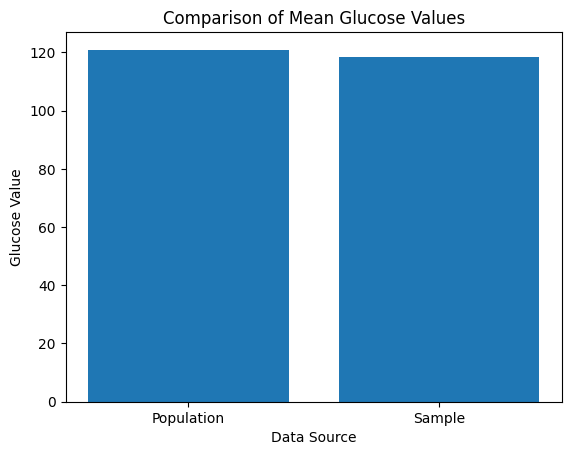

In [5]:
# plotting the bar graph for mean glucose values calculated above
mean_data = [total_mean, mean_df]
mean_labels = ['Population', 'Sample']
plt.bar(mean_labels, mean_data)
plt.title('Comparison of Mean Glucose Values')
plt.xlabel('Data Source')
plt.ylabel('Glucose Value')
plt.show()

The results from the above bar plot clearly show that the mean of the sample and population glucose feature is almost the same.

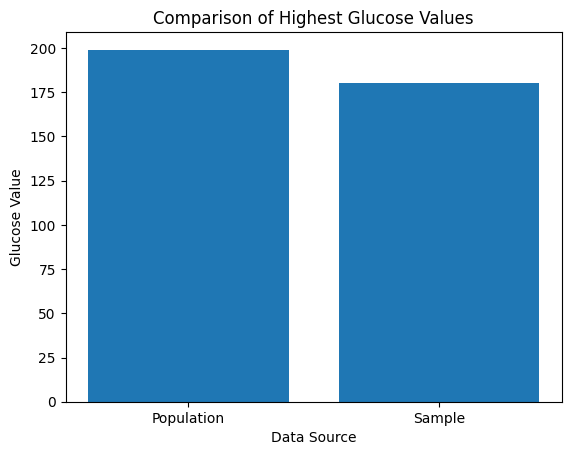

In [6]:
# plotting the bar graph for max glucose values calculated above
max_data = [highest, highest_df]
max_labels = ['Population', 'Sample']
plt.bar(max_labels, max_data)
plt.title('Comparison of Highest Glucose Values')
plt.xlabel('Data Source')
plt.ylabel('Glucose Value')
plt.show()

From the plot above the highest value for the sample is around 175 - 200 and for the population it is almost 200. It might be almost close for this sample to reach the population results but that cant be true with every sample as the samples change the values might change too.

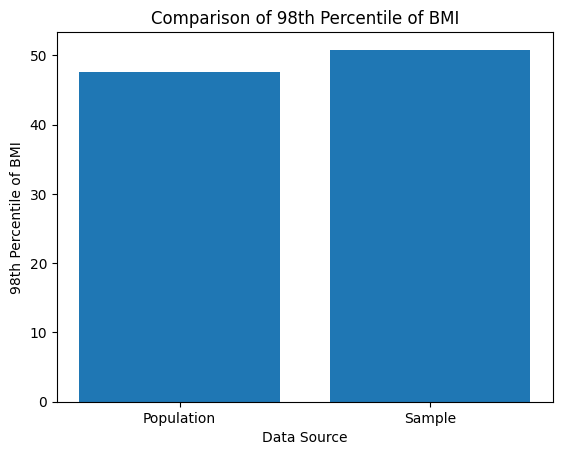

In [7]:
# calculating the bmi values 
sample_bmi_98th_percentile = np.percentile(df['BMI'], 98)
population_bmi_98th_percentile = np.percentile(data['BMI'], 98)

# creating a dataframe to keep the values together.
percentile_data = [population_bmi_98th_percentile, sample_bmi_98th_percentile]
percentile_labels = ['Population', 'Sample']

# plotting a bar chart to compare the results
plt.bar(percentile_labels, percentile_data)
plt.title('Comparison of 98th Percentile of BMI')
plt.xlabel('Data Source')
plt.ylabel('98th Percentile of BMI')
plt.show()


The results from the bar plot above show that 98th percentile of both the sample and population data dosent have much of a difference.

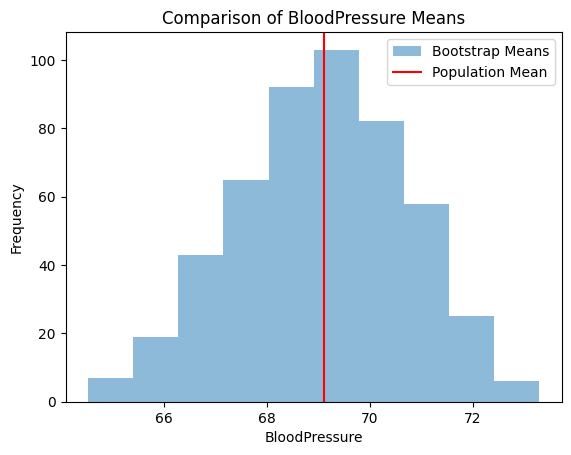

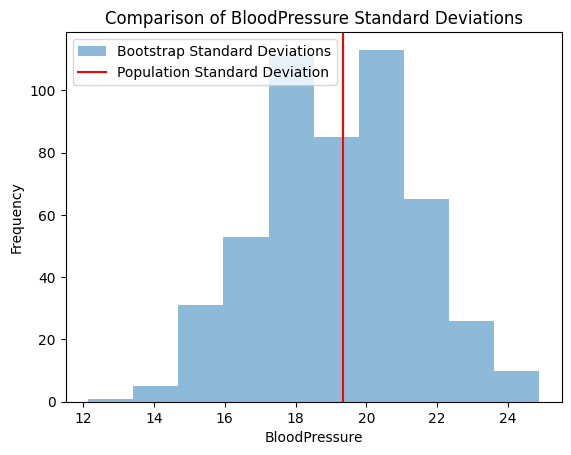

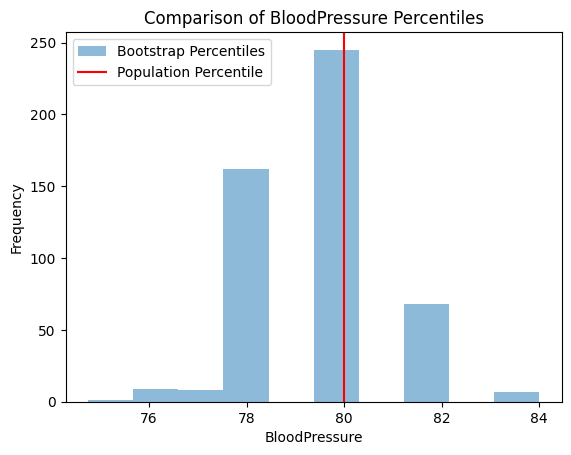

In [11]:
# Create a function to generate a bootstrap sample of 150 observations
def bootstrap_sample():
    return np.random.choice(data['BloodPressure'], size=150, replace=True)

# Generate 500 bootstrap samples of 150 observations each
bootstrap_means = []
bootstrap_stds = []
bootstrap_percentiles = []
for i in range(500):
    sample = bootstrap_sample()
    bootstrap_means.append(np.mean(sample))
    bootstrap_stds.append(np.std(sample))
    bootstrap_percentiles.append(np.percentile(sample, 75))

# Find the mean, standard deviation, and percentile for BloodPressure in the population
population_mean = np.mean(data['BloodPressure'])
population_std = np.std(data['BloodPressure'])
population_percentile = np.percentile(data['BloodPressure'], 75)

# Create a histogram to compare the mean of the bootstrap samples with the population mean
plt.hist(bootstrap_means, alpha=0.5, label='Bootstrap Means')
plt.axvline(population_mean, color='red', label='Population Mean')
plt.title('Comparison of BloodPressure Means')
plt.xlabel('BloodPressure')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Create a histogram to compare the standard deviation of the bootstrap samples with the population standard deviation
plt.hist(bootstrap_stds, alpha=0.5, label='Bootstrap Standard Deviations')
plt.axvline(population_std, color='red', label='Population Standard Deviation')
plt.title('Comparison of BloodPressure Standard Deviations')
plt.xlabel('BloodPressure')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Create a histogram to compare the percentile of the bootstrap samples with the population percentile
plt.hist(bootstrap_percentiles, alpha=0.5, label='Bootstrap Percentiles')
plt.axvline(population_percentile, color='red', label='Population Percentile')
plt.title('Comparison of BloodPressure Percentiles')
plt.xlabel('BloodPressure')
plt.ylabel('Frequency')
plt.legend()
plt.show()


As we can see from the results that the mean, standard deviation and percentile of sample data and the population data almost close or same. From this we can conclude that for this data set working with the sample data and the whole data would yield in almlst similar results.